In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/AI/Assignments/compresive_strength_concrete.csv')

In [3]:
dataset.head(1)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99


In [4]:
dataset.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [5]:
dataset.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'Cement',
                        'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'BlastFurnaceSlag',
                        'Fly Ash (component 3)(kg in a m^3 mixture)':'FlyAsh',
                        'Water  (component 4)(kg in a m^3 mixture)':'Water',
                        'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
                        'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'CoarseAggregate',	
                        'Fine Aggregate (component 7)(kg in a m^3 mixture)':'FineAggregate',
                        'Age (day)':'Age',
                        'Concrete compressive strength(MPa, megapascals) ':'ConcreteStrength'},inplace=True)

In [6]:
dataset.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
dataset.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteStrength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [26]:
dataset.isnull().sum()

Cement              0
BlastFurnaceSlag    0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAggregate     0
FineAggregate       0
Age                 0
ConcreteStrength    0
dtype: int64

In [9]:
dataset.isna().sum()

Cement              0
BlastFurnaceSlag    0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAggregate     0
FineAggregate       0
Age                 0
ConcreteStrength    0
dtype: int64

In [10]:
y = dataset['ConcreteStrength']

In [ ]:
dataset.drop(columns='ConcreteStrength', inplace=True)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   BlastFurnaceSlag  1030 non-null   float64
 2   FlyAsh            1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   CoarseAggregate   1030 non-null   float64
 6   FineAggregate     1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   ConcreteStrength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [12]:
x_train = dataset[:515]
y_train = y[:515]

x_test = dataset[515:824]
y_test = y[515:824]

x_val = dataset[824:1030]
y_val = y[824:1030]

In [13]:
x_train.shape,x_val.shape,x_test.shape

((515, 9), (206, 9), (309, 9))

In [14]:
y_train.shape,y_val.shape,y_test.shape

((515,), (206,), (309,))

In [15]:
mean = x_train.iloc[:,0:7].mean(axis=0)
x_train.iloc[:,0:7] -= mean
std = x_train.iloc[:,0:7].std(axis=0)
x_train.iloc[:,0:7] /= std

mean = x_val.iloc[:,0:7].mean(axis=0)
x_val.iloc[:,0:7] -= mean
std = x_val.iloc[:,0:7].std(axis=0)
x_val.iloc[:,0:7] /= std

mean = x_test.iloc[:,0:7].mean(axis=0)
x_test.iloc[:,0:7] -= mean
std = x_test.iloc[:,0:7].std(axis=0)
x_test.iloc[:,0:7] /= std

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [16]:
x_train.head(2)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteStrength
0,2.317058,-0.843539,-1.114583,-0.473765,-1.035547,0.808263,-1.197012,28,79.99
1,2.317058,-0.843539,-1.114583,-0.473765,-1.035547,1.010574,-1.197012,28,61.89


In [17]:
mean = y_train.iloc[:].mean(axis=0)
y_train.iloc[:] -= mean
std = y_train.iloc[:].std(axis=0)
y_train.iloc[:] /= std

mean = y_val.iloc[:].mean(axis=0)
y_val.iloc[:] -= mean
std = y_val.iloc[:].std(axis=0)
y_val.iloc[:] /= std

mean = y_test.iloc[:].mean(axis=0)
y_test.iloc[:] -= mean
std = y_test.iloc[:].std(axis=0)
y_test.iloc[:] /= std

In [18]:
x_train.head(2)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteStrength
0,2.317058,-0.843539,-1.114583,-0.473765,-1.035547,0.808263,-1.197012,28,2.238902
1,2.317058,-0.843539,-1.114583,-0.473765,-1.035547,1.010574,-1.197012,28,1.163579


In [19]:
y_train

0      2.238902
1      1.163579
2     -0.120868
3     -0.074528
4      0.118555
         ...   
510   -0.196319
511    1.389931
512   -0.605654
513   -0.119680
514    1.904423
Name: ConcreteStrength, Length: 515, dtype: float64

In [20]:
from keras import models, layers, optimizers

In [21]:
network = models.Sequential()

In [27]:
network.add(layers.Dense(10,activation='tanh',input_shape=(x_train.shape[1],)))
network.add(layers.Dense(8,activation='tanh'))
network.add(layers.Dense(6,activation='tanh'))


In [28]:
network.compile(optimizer='rmsprop', loss='mse', metrics='mae')

In [29]:
history = network.fit(x_train,y_train,
                      batch_size=20,
                      epochs=100,
                      validation_data=(x_val,y_val))

Epoch 1/100
26/26 [==============================] - 1s 12ms/step - loss: 0.9663 - mae: 0.7945 - val_loss: 1.0119 - val_mae: 0.7910
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 0.9098 - mae: 0.7923 - val_loss: 1.0160 - val_mae: 0.7938
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 0.8309 - mae: 0.7510 - val_loss: 1.0233 - val_mae: 0.7972
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 0.7155 - mae: 0.6899 - val_loss: 1.0273 - val_mae: 0.7971
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: 0.6852 - mae: 0.6767 - val_loss: 0.9903 - val_mae: 0.7783
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 0.5862 - mae: 0.6286 - val_loss: 0.8011 - val_mae: 0.7031
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 0.5069 - mae: 0.5763 - val_loss: 0.6902 - val_mae: 0.6581
Epoch 8/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4934 - 

In [30]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [31]:
epochs = range(1,101)

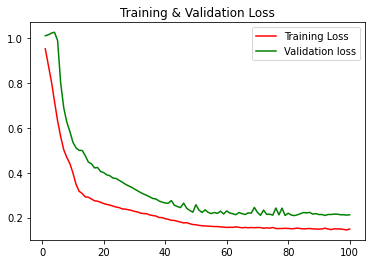

In [32]:
plt.title('Training & Validation Loss')
plt.xlabel='Epochs'
plt.ylabel='Loss'

Training_loss = history_dict['loss']
val_loss = history_dict['val_loss']

plt.plot(epochs, Training_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss,'g', label='Validation loss')

plt.legend()
plt.show()

<function matplotlib.pyplot.show>

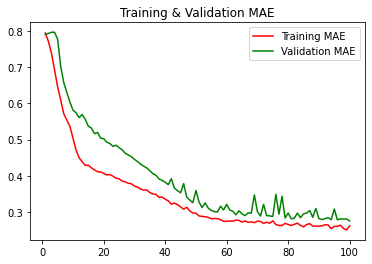

In [33]:
plt.clf()
plt.title('Training & Validation MAE')

Training_MAE = history_dict['mae']
val_mae = history_dict['val_mae']

plt.plot(epochs, Training_MAE, 'r', label='Training MAE')
plt.plot(epochs, val_mae, 'g', label='Validation MAE')

plt.legend()
plt.show

In [36]:
results= network.evaluate(x_train,y_train)
results

17/17 [==============================] - 0s 1ms/step - loss: 0.1439 - mae: 0.2478


[0.14386695623397827, 0.24783773720264435]

In [34]:
Training_results= network.evaluate(x_train,y_train)
Training_results


17/17 [==============================] - 0s 1ms/step - loss: 0.1439 - mae: 0.2478


[0.14386695623397827, 0.24783773720264435]

In [35]:
Validation_results= network.evaluate(x_val,y_val)
Validation_results

7/7 [==============================] - 0s 2ms/step - loss: 0.2127 - mae: 0.2746


[0.21265405416488647, 0.2745983600616455]

In [38]:
prediction = network.predict(x_test)
prediction

array([[-0.24009947, -0.24117343, -0.2403786 , -0.24104166, -0.24143545,
        -0.24005057],
       [-0.9951205 , -0.9947007 , -0.99503994, -0.99473315, -0.99460834,
        -0.9950833 ],
       [-0.9821332 , -0.9814321 , -0.9819932 , -0.9814559 , -0.9812282 ,
        -0.98206556],
       ...,
       [-0.62649626, -0.627772  , -0.62683403, -0.62737113, -0.62759805,
        -0.62641567],
       [-0.19045159, -0.1913407 , -0.19068381, -0.19126418, -0.19163491,
        -0.19040465],
       [ 0.10563677,  0.10621106,  0.10577364,  0.10595869,  0.10587164,
         0.10568062]], dtype=float32)

In [39]:
prediction.shape

(309, 6)